In [1]:
import torch
import numpy as np

## Basics

In [2]:
x = torch.empty(2)
print(x)
x = torch.empty(2, 3)
print(x)
x = torch.empty(2, 2, 3)
print(x)

tensor([2.5568e+05, 4.5891e-41])
tensor([[4.3700e-38, 0.0000e+00, 1.5078e-35],
        [0.0000e+00, 8.9683e-44, 0.0000e+00]])
tensor([[[1.7770e+14, 4.5891e-41, 1.7770e+14],
         [4.5891e-41, 4.4842e-44, 0.0000e+00]],

        [[1.5695e-43, 0.0000e+00, 8.2508e-42],
         [0.0000e+00, 0.0000e+00, 0.0000e+00]]])


In [3]:
x = torch.rand(2, 3)
print(x)

tensor([[0.0706, 0.3740, 0.3657],
        [0.9808, 0.3887, 0.5753]])


In [4]:
x = torch.zeros(2, 3)
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [5]:
x = torch.ones(2, 3)
print(x.dtype)
print(x)

torch.float32
tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [6]:
x = torch.rand(2, 3, dtype=torch.double)
print(x)
x = torch.rand(2, 3, dtype=torch.float16)
print(x)
print(x.size())

tensor([[0.0297, 0.3259, 0.0560],
        [0.2741, 0.7058, 0.1326]], dtype=torch.float64)
tensor([[0.9126, 0.2129, 0.4351],
        [0.7324, 0.1162, 0.1201]], dtype=torch.float16)
torch.Size([2, 3])


In [7]:
x = torch.tensor([1, 2, 3])
print(x)

tensor([1, 2, 3])


In [8]:
x = torch.rand(2, 2)
y = torch.rand(2, 2)
print(x + y)
print(torch.add(x, y))
y.add_(x) # Inplace addition
print(y)

tensor([[0.9421, 1.1798],
        [0.9029, 0.9756]])
tensor([[0.9421, 1.1798],
        [0.9029, 0.9756]])
tensor([[0.9421, 1.1798],
        [0.9029, 0.9756]])


In [9]:
x = torch.rand(5, 3)
print(x)
print(x[1, 1])
print(x[1, 1].item())

tensor([[0.4497, 0.8645, 0.9007],
        [0.1759, 0.6925, 0.6840],
        [0.0381, 0.3421, 0.2394],
        [0.2476, 0.8769, 0.0895],
        [0.0600, 0.7493, 0.3580]])
tensor(0.6925)
0.6924746632575989


In [10]:
x = torch.rand(4, 4)
print(x)
y = x.view(16)
print(y)
y = x.view(-1, 8) # Pytorch automatically identifies the other dimension as 2
print(y)

tensor([[0.8569, 0.1575, 0.7283, 0.0938],
        [0.8736, 0.0393, 0.3992, 0.6264],
        [0.8426, 0.3426, 0.7762, 0.2920],
        [0.2242, 0.3404, 0.5155, 0.8650]])
tensor([0.8569, 0.1575, 0.7283, 0.0938, 0.8736, 0.0393, 0.3992, 0.6264, 0.8426,
        0.3426, 0.7762, 0.2920, 0.2242, 0.3404, 0.5155, 0.8650])
tensor([[0.8569, 0.1575, 0.7283, 0.0938, 0.8736, 0.0393, 0.3992, 0.6264],
        [0.8426, 0.3426, 0.7762, 0.2920, 0.2242, 0.3404, 0.5155, 0.8650]])


In [11]:
a = torch.ones(5)
print(a)
b = a.numpy()
print(b)

a.add_(1)
print(a)
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [12]:
a = np.ones(5)
print(a)
b = torch.from_numpy(a)
print(b)

a += 1
print(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [13]:
torch.cuda.is_available()

False

In [14]:
if torch.cuda.is_available():
    x = torch.rand(5, device=torch.device("cuda"))
    y = torch.ones(5)
    y = y.to(torch.device("cuda"))
    z = x + y
    z = z.to("cpu").numpy()

## Autograd

In [15]:
x = torch.randn(3, requires_grad=True)
print(x)
print(x.grad)

tensor([ 0.0091, -0.2331,  1.3855], requires_grad=True)
None


In [16]:
y = x + 2 # creates a computational graph
print(y) # grad_fn=<AddBackward0> is for backpropogation for addition

tensor([2.0091, 1.7669, 3.3855], grad_fn=<AddBackward0>)


In [17]:
z = y * y * 2
print(z) # grad_fn=<MulBackward0> is for backpropogation for multiplication

tensor([ 8.0730,  6.2442, 22.9231], grad_fn=<MulBackward0>)


In [18]:
z = z.mean()
print(z) # grad_fn=<MeanBackward0> is for backpropogation for mean

tensor(12.4134, grad_fn=<MeanBackward0>)


In [19]:
z.backward() # dz/dx
print(x.grad)

tensor([2.6788, 2.3559, 4.5140])


In [20]:
x = torch.randn(3, requires_grad=True)
print(x)

x.requires_grad_(False)
print(x)

tensor([ 1.3429, -1.0649, -0.9549], requires_grad=True)
tensor([ 1.3429, -1.0649, -0.9549])


In [21]:
x = torch.randn(3, requires_grad=True)
print(x)

y = x.detach()
print(y)

tensor([-0.1735,  2.5715, -1.7201], requires_grad=True)
tensor([-0.1735,  2.5715, -1.7201])


In [22]:
x = torch.randn(3, requires_grad=True)
print(x)

with torch.no_grad():
    y = x + 2
    print(y)

tensor([0.2695, 0.1588, 1.6959], requires_grad=True)
tensor([2.2695, 2.1588, 3.6959])


## Gradient calculation - Basic
- f(x) = y_hat = w * x (where x is input and y is output)
- Say x = 1, y = 2, w = 1
- Step1: forward
    - y_hat = w * x = 1
    - S = y_hat - y = -1
    - Loss = (S)^2 = 1
- Step2: local gradients
    - dLoss/dS = dS^2/dS = 2S
    - dS/dy_hat = d(y_hat - y)/d(y_hat) = 1
    - dy_hat/dw = d(w * x)/d(w) = x
- Step3: Backward pass
    - dLoss/dy_hat = (dLoss/dS) * (dS/dy_hat) = 2S = 2 * -1 = -2
    - dLoss/dw = (dLoss/dy_hat) * (dy_hat/dw) = 2 * x = -2 * 1 = -2

In [23]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad = True) # to compute local gradients

# forward pass and compute the loss
y_hat = w * x
loss = (y_hat - y)**2

# backward pass
loss.backward()
print(w.grad)

# update weights
# next forward and backward pass - repeat

tensor(-2.)


## Gradient calculation - Linear regression
- f = w * x

### Manually using numpy

In [24]:
X = np.array([1, 2, 3, 4], dtype=np.float32) # Training inputs
y = np.array([2, 4, 6, 8], dtype=np.float32) # Outputs

w = 0.0

# model prediction
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_hat):
    return ((y_hat - y)**2).mean()

# gradient of loss
# J = MSE = 1/N * (w*x - y) ** 2
# dJ/dw = 1/N 2x (w*x - y)
def gradient(x, y, y_hat):
    return np.dot(2*x, y_hat-y).mean()

print(f"Prediction before training: f(5) = {forward(5):.3f}")

# Training
learning_rate = 0.01
n_epochs = 100

for epoch in range(n_epochs):
    # prediction = forward pass
    y_hat = forward(X)
    
    # loss
    l = loss(y, y_hat)
    
    # gradients
    dw = gradient(X, y, y_hat)
    
    # update weights
    w -= learning_rate * dw
    
    if epoch % 5 == 0:
        print(f"Epoch: {epoch + 1}, w = {w:.3f}, loss = {l:.8f}")
        
print(f"Prediction after training: f(5) = {forward(5):.3f}")

Prediction before training: f(5) = 0.000
Epoch: 1, w = 1.200, loss = 30.00000000
Epoch: 6, w = 1.992, loss = 0.00314570
Epoch: 11, w = 2.000, loss = 0.00000033
Epoch: 16, w = 2.000, loss = 0.00000000
Epoch: 21, w = 2.000, loss = 0.00000000
Epoch: 26, w = 2.000, loss = 0.00000000
Epoch: 31, w = 2.000, loss = 0.00000000
Epoch: 36, w = 2.000, loss = 0.00000000
Epoch: 41, w = 2.000, loss = 0.00000000
Epoch: 46, w = 2.000, loss = 0.00000000
Epoch: 51, w = 2.000, loss = 0.00000000
Epoch: 56, w = 2.000, loss = 0.00000000
Epoch: 61, w = 2.000, loss = 0.00000000
Epoch: 66, w = 2.000, loss = 0.00000000
Epoch: 71, w = 2.000, loss = 0.00000000
Epoch: 76, w = 2.000, loss = 0.00000000
Epoch: 81, w = 2.000, loss = 0.00000000
Epoch: 86, w = 2.000, loss = 0.00000000
Epoch: 91, w = 2.000, loss = 0.00000000
Epoch: 96, w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


### Using torch - manual loss & optimizer

In [25]:
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32) # Training inputs
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32) # Outputs

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_hat):
    return ((y_hat - y)**2).mean()

print(f"Prediction before training: f(5) = {forward(5):.3f}")

# Training
learning_rate = 0.01
n_epochs = 100

for epoch in range(n_epochs):
    # prediction = forward pass
    y_hat = forward(X)
    
    # loss
    l = loss(y, y_hat)
    
    # gradients
    l.backward() # dl/dw
    
    # update weights
    with torch.no_grad():
        w -= learning_rate * w.grad
        
    # zero the gradients
    w.grad.zero_() # inplace
    
    if epoch % 5 == 0:
        print(f"Epoch: {epoch + 1}, w = {w:.3f}, loss = {l:.8f}")
        
print(f"Prediction after training: f(5) = {forward(5):.3f}")

Prediction before training: f(5) = 0.000
Epoch: 1, w = 0.300, loss = 30.00000000
Epoch: 6, w = 1.246, loss = 5.90623236
Epoch: 11, w = 1.665, loss = 1.16278565
Epoch: 16, w = 1.851, loss = 0.22892261
Epoch: 21, w = 1.934, loss = 0.04506890
Epoch: 26, w = 1.971, loss = 0.00887291
Epoch: 31, w = 1.987, loss = 0.00174685
Epoch: 36, w = 1.994, loss = 0.00034392
Epoch: 41, w = 1.997, loss = 0.00006770
Epoch: 46, w = 1.999, loss = 0.00001333
Epoch: 51, w = 1.999, loss = 0.00000262
Epoch: 56, w = 2.000, loss = 0.00000052
Epoch: 61, w = 2.000, loss = 0.00000010
Epoch: 66, w = 2.000, loss = 0.00000002
Epoch: 71, w = 2.000, loss = 0.00000000
Epoch: 76, w = 2.000, loss = 0.00000000
Epoch: 81, w = 2.000, loss = 0.00000000
Epoch: 86, w = 2.000, loss = 0.00000000
Epoch: 91, w = 2.000, loss = 0.00000000
Epoch: 96, w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


### Using torch - semi automation
1) Design model (input_size, output_size, forward pass)

2) Construct loss & optimizer

3) Training loop

    - forward pass: compute prediction
    - backward pass: compute gradients
    - update weights

In [26]:
import torch.nn as nn

X = torch.tensor([1, 2, 3, 4], dtype=torch.float32) # Training inputs
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32) # Outputs

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
    return w * x

print(f"Prediction before training: f(5) = {forward(5):.3f}")

# Training
learning_rate = 0.01
n_epochs = 100

# loss = MSE
loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr=learning_rate)

for epoch in range(n_epochs):
    # prediction = forward pass
    y_hat = forward(X)
    
    # loss
    l = loss(y, y_hat)
    
    # gradients
    l.backward() # dl/dw
    
    # update weights
    optimizer.step()
    
    # zero the gradients
    optimizer.zero_grad() # inplace
    
    if epoch % 5 == 0:
        print(f"Epoch: {epoch + 1}, w = {w:.3f}, loss = {l:.8f}")
        
print(f"Prediction after training: f(5) = {forward(5):.3f}")

Prediction before training: f(5) = 0.000
Epoch: 1, w = 0.300, loss = 30.00000000
Epoch: 6, w = 1.246, loss = 5.90623236
Epoch: 11, w = 1.665, loss = 1.16278565
Epoch: 16, w = 1.851, loss = 0.22892261
Epoch: 21, w = 1.934, loss = 0.04506890
Epoch: 26, w = 1.971, loss = 0.00887291
Epoch: 31, w = 1.987, loss = 0.00174685
Epoch: 36, w = 1.994, loss = 0.00034392
Epoch: 41, w = 1.997, loss = 0.00006770
Epoch: 46, w = 1.999, loss = 0.00001333
Epoch: 51, w = 1.999, loss = 0.00000262
Epoch: 56, w = 2.000, loss = 0.00000052
Epoch: 61, w = 2.000, loss = 0.00000010
Epoch: 66, w = 2.000, loss = 0.00000002
Epoch: 71, w = 2.000, loss = 0.00000000
Epoch: 76, w = 2.000, loss = 0.00000000
Epoch: 81, w = 2.000, loss = 0.00000000
Epoch: 86, w = 2.000, loss = 0.00000000
Epoch: 91, w = 2.000, loss = 0.00000000
Epoch: 96, w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


### Using torch - full automation
1) Design model (input_size, output_size, forward pass)

2) Construct loss & optimizer

3) Training loop

    - forward pass: compute prediction
    - backward pass: compute gradients
    - update weights

In [27]:
import torch.nn as nn

X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32) # Training inputs
y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32) # Outputs

n_samples, n_features = X.shape # Changed here

X_test = torch.tensor([5], dtype=torch.float32) # Changed here
class LinearRegression(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define layers
        self.lin = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.lin(x)

# model definition
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size) # Changed here
model = LinearRegression(input_size, output_size) # Changed here - Either above or this can be used

print(f"Prediction before training: f(5) = {model(X_test).item():.3f}") # Changed here

# Training
learning_rate = 0.1 # Increase learning rate
n_epochs = 300

# loss = MSE
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # Changed here

for epoch in range(n_epochs):
    # prediction = forward pass
    y_hat = model(X) # Changed here
    
    # loss
    l = loss(y, y_hat)
    
    # gradients
    l.backward() # dl/dw
    
    # update weights
    optimizer.step()
    
    # zero the gradients
    optimizer.zero_grad() # inplace
    
    if epoch % 50 == 0:
        [w, b] = model.parameters()
        print(f"Epoch: {epoch + 1}, w = {w[0][0].item():.3f}, loss = {l:.8f}")
        
print(f"Prediction before training: f(5) = {model(X_test).item():.3f}") # Changed here

Prediction before training: f(5) = -1.278
Epoch: 1, w = 2.834, loss = 35.01121521
Epoch: 51, w = 1.900, loss = 0.01543145
Epoch: 101, w = 1.978, loss = 0.00073843
Epoch: 151, w = 1.995, loss = 0.00003534
Epoch: 201, w = 1.999, loss = 0.00000169
Epoch: 251, w = 2.000, loss = 0.00000008
Prediction before training: f(5) = 10.000


## Linear Regression

In [28]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

torch.Size([100])
torch.Size([100, 1])
Epoch: 50, Loss: 678.5157
Epoch: 100, Loss: 385.0354
Epoch: 150, Loss: 326.9630
Epoch: 200, Loss: 315.2371
Epoch: 250, Loss: 312.8397
Epoch: 300, Loss: 312.3459
Epoch: 350, Loss: 312.2437
Epoch: 400, Loss: 312.2226
Epoch: 450, Loss: 312.2181
Epoch: 500, Loss: 312.2173


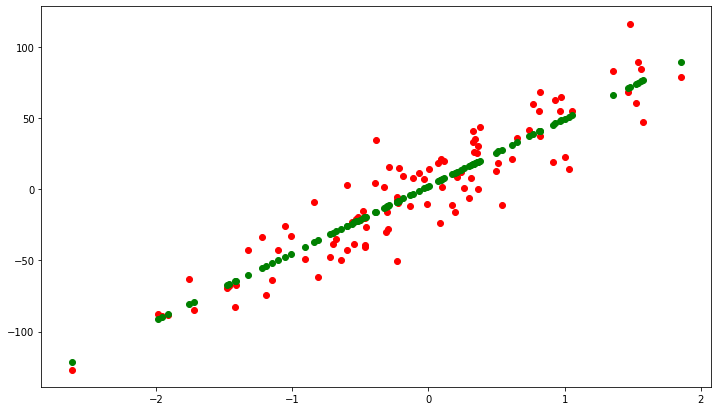

In [29]:
X, y = datasets.make_regression(n_samples=100,
                                n_features=1,
                                noise=20,
                                random_state=42)

X = torch.from_numpy(X.astype(np.float32))
y = torch.from_numpy(y.astype(np.float32))
print(y.shape)

y = y.view(y.shape[0], 1)
print(y.shape)

n_samples, n_features = X.shape

# Define model
model = nn.Linear(in_features=n_features, out_features=1)

# Define loss & optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
# - forward pass
# - backward pass
# - weights update
n_epochs = 500
for epoch in range(n_epochs):
    y_hat = model(X)
    loss = criterion(y_hat, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()  # empty gradients
    if (epoch + 1) % 50 == 0:
        print(f"Epoch: {epoch + 1}, Loss: {loss.item():.4f}")

# Plot
predicted = model(X).detach().numpy() # Detaching it from computational graph
plt.figure(figsize=(12, 7))
plt.plot(X, y, 'ro')
plt.plot(X, predicted, 'go')

## Logistic regression

In [30]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [31]:
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
print(y.shape)

n_samples, n_features = X.shape

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

# reshape
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

# model
# # f = Sigmod(wx + b)
class LogisticRegression(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)
    
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred
    
model = LogisticRegression(n_features)

# loss & optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# training loop
n_epochs = 1000
for epoch in range(n_epochs):
    # forward pass
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    
    # backward pass
    loss.backward()
    
    # weights update
    optimizer.step()
    
    # clear gradients to zero
    optimizer.zero_grad()
    
    if (epoch+1) % 50 == 0:
        print(f"Epoch: {epoch + 1}, Loss = {loss.item():.4f}")
        
# evaluation
with torch.no_grad(): # as evaluation should not be part of computational graph
    y_pred = model(X_test)
    y_pred = y_pred.round()
    acc = (y_pred.eq(y_test).sum())/float(y_test.shape[0])
    print(f"Accuracy: {acc:.4f}")

(569,)
Epoch: 50, Loss = 0.3095
Epoch: 100, Loss = 0.2425
Epoch: 150, Loss = 0.2092
Epoch: 200, Loss = 0.1886
Epoch: 250, Loss = 0.1742
Epoch: 300, Loss = 0.1635
Epoch: 350, Loss = 0.1551
Epoch: 400, Loss = 0.1483
Epoch: 450, Loss = 0.1427
Epoch: 500, Loss = 0.1379
Epoch: 550, Loss = 0.1337
Epoch: 600, Loss = 0.1301
Epoch: 650, Loss = 0.1269
Epoch: 700, Loss = 0.1241
Epoch: 750, Loss = 0.1215
Epoch: 800, Loss = 0.1191
Epoch: 850, Loss = 0.1170
Epoch: 900, Loss = 0.1150
Epoch: 950, Loss = 0.1132
Epoch: 1000, Loss = 0.1115
Accuracy: 0.9883


## Dataset & DataLoader
- epoch: forward & backward pass of ALL TRAINING SAMPLES
- batch_size: number of training samples in one forward & backward pass
- n_iters: no. of passes, each pass using [batch_size] number of samples
- Ex: 100 samples, batch_size = 20 --> 5 interations for 1 epoch

In [32]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
import math

In [33]:
class WineDataset(Dataset):
    
    def __init__(self):
        # data loading
        xy = pd.read_csv("../data/wine.csv")
        self.x = torch.from_numpy(xy.drop("Wine", axis=1).values.astype(np.float32))
        self.y = torch.from_numpy(xy[["Wine"]].values.astype(np.float32))
        self.n_samples = xy.shape[0]
    
    def __getitem__(self, index):
        # dataset[0]
        return self.x[index], self.y[index]
        
    def __len__(self):
        # len(dataset)
        return self.n_samples
    
dataset = WineDataset()
print(dataset[0])

batch_size = 4
dataloader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, num_workers=2)

# training loop
n_epochs = 2
total_samples = len(dataset)
n_iters = math.ceil(total_samples/batch_size)
print(total_samples, n_iters)
for epoch in range(n_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        # forward
        # backward
        # update
        print(f"Epochs: {epoch+1}/{n_epochs}, Iter: {i+1}/{n_iters}, Input: {inputs.shape}")

(tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]), tensor([1.]))
178 45
Epochs: 1/2, Iter: 1/45, Input: torch.Size([4, 13])
Epochs: 1/2, Iter: 2/45, Input: torch.Size([4, 13])
Epochs: 1/2, Iter: 3/45, Input: torch.Size([4, 13])
Epochs: 1/2, Iter: 4/45, Input: torch.Size([4, 13])
Epochs: 1/2, Iter: 5/45, Input: torch.Size([4, 13])
Epochs: 1/2, Iter: 6/45, Input: torch.Size([4, 13])
Epochs: 1/2, Iter: 7/45, Input: torch.Size([4, 13])
Epochs: 1/2, Iter: 8/45, Input: torch.Size([4, 13])
Epochs: 1/2, Iter: 9/45, Input: torch.Size([4, 13])
Epochs: 1/2, Iter: 10/45, Input: torch.Size([4, 13])
Epochs: 1/2, Iter: 11/45, Input: torch.Size([4, 13])
Epochs: 1/2, Iter: 12/45, Input: torch.Size([4, 13])
Epochs: 1/2, Iter: 13/45, Input: torch.Size([4, 13])
Epochs: 1/2, Iter: 14/45, Input: torch.Size([4, 13])
Epochs: 1/2, Iter: 15/45, Input: torch.Size([4, 13])
Epochs: 1/

## Dataset Transforms

In [34]:
import torch
import torchvision

### Inbuilt-transforms
- https://pytorch.org/vision/stable/transforms.html

In [35]:
dataset = torchvision.datasets.MNIST(root="../data", transform=torchvision.transforms.ToTensor(), download=False)

### Custom transforms

In [36]:
class WineDataset(Dataset):
    
    def __init__(self, transform=None):
        # data loading
        xy = pd.read_csv("../data/wine.csv")
        self.x = xy.drop("Wine", axis=1).values.astype(np.float32)
        self.y = xy[["Wine"]].values.astype(np.float32)
        self.n_samples = xy.shape[0]
        self.transform = transform
    
    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        if self.transform:
            sample = self.transform(sample)
        return sample
        
    def __len__(self):
        # len(dataset)
        return self.n_samples
    
class ToTensor():
    
    def __call__(self, sample):
        inputs, labels = sample
        return torch.from_numpy(inputs), torch.from_numpy(labels)
    
class MulTransform():
    def __init__(self, factor):
        self.factor = factor
        
    def __call__(self, sample):
        inputs, labels = sample
        return inputs * self.factor, labels
    
    
dataset = WineDataset(transform=None)
print(dataset[0])
dataset = WineDataset(transform=ToTensor())
print(dataset[0])
dataset = WineDataset(transform=MulTransform(2))
print(dataset[0])

(array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03], dtype=float32), array([1.], dtype=float32))
(tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]), tensor([1.]))
(array([2.846e+01, 3.420e+00, 4.860e+00, 3.120e+01, 2.540e+02, 5.600e+00,
       6.120e+00, 5.600e-01, 4.580e+00, 1.128e+01, 2.080e+00, 7.840e+00,
       2.130e+03], dtype=float32), array([1.], dtype=float32))


### Composed transforms
- multiple transforms at a time

In [37]:
composed = torchvision.transforms.Compose([ToTensor(), MulTransform(2)])
dataset = WineDataset(transform=composed)
print(dataset[0])

(tensor([2.8460e+01, 3.4200e+00, 4.8600e+00, 3.1200e+01, 2.5400e+02, 5.6000e+00,
        6.1200e+00, 5.6000e-01, 4.5800e+00, 1.1280e+01, 2.0800e+00, 7.8400e+00,
        2.1300e+03]), tensor([1.]))


## Softmax & CrossEntropy
### Softmax

In [38]:
def softmax_np(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.array([2, 1, 0.1], dtype=np.float32)
print(softmax_np(x))

x = torch.tensor([2, 1, 0.1], dtype = torch.float32)
torch.softmax(x, axis=0)

[0.6590011  0.24243295 0.09856589]


tensor([0.6590, 0.2424, 0.0986])

### Cross-entropy
- **Note:** torch CrossEntropyLoss applies Softmax inside, hence provide raw logits scores (no softmax layer)
- **Note:** torch CrossEntropyLoss applies OHE inside, hence provide original class not onehotencoded
- **Note:** torch BCELoss needs Sigmoid at the end !!

In [39]:
def cross_entropy_np(actual, predicted):
    loss = -np.sum(actual * np.log(predicted))
    return loss # /float(predicted.shape[0])

y = np.array([1, 0, 0])
y_pred_good = np.array([0.7, 0.2, 0.1])
y_pred_bad = np.array([[0.1, 0.3, 0.6]])
print(cross_entropy_np(y, y_pred_good))
print(cross_entropy_np(y, y_pred_bad))

## Using torch
loss = nn.CrossEntropyLoss()
y = torch.tensor([0])
# nsamples x nclasses
y_pred_good = torch.tensor([[2.0, 1.0, 0.1]])
y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])
print(loss(y_pred_good, y).item())
print(loss(y_pred_bad, y).item())

0.35667494393873245
2.3025850929940455
0.4170299470424652
1.840616226196289


## Activation functions
- Step function: 1 if x >= threshold else 0
- Sigmoid: 1/(1 + exp(-x)), ranges (0, 1) - used in binary classification
- TanH: Scaled & Shifted Sigmoid: (2/(1 + exp(-2x))) - 1, ranges (-1, 1)
- ReLU: max(0, x)
- Leaky ReLU: solves vanishing gradient [x if x >=0 else a * x]
- Softmax

In [40]:
# print(torch.relu(torch.tensor([-1, 3])))
# print(torch.softmax(torch.tensor([-1, 3])))
# print(torch.sigmoid(torch.tensor([-1, 3])))
# print(torch.tanh(torch.tensor([-1, 3])))

In [41]:
import torch.nn.functional as F
F.leaky_relu(torch.tensor([-1, 3], dtype=torch.float32), negative_slope=0.01)

tensor([-0.0100,  3.0000])

## FFN

Device used: cpu
torch.Size([100, 1, 28, 28]) torch.Size([100])
Epoch: 1/2, Step: 100/600, Loss: 0.1509
Epoch: 1/2, Step: 200/600, Loss: 0.1543
Epoch: 1/2, Step: 300/600, Loss: 0.2302
Epoch: 1/2, Step: 400/600, Loss: 0.1229
Epoch: 1/2, Step: 500/600, Loss: 0.1473
Epoch: 1/2, Step: 600/600, Loss: 0.1789
Epoch: 2/2, Step: 100/600, Loss: 0.0826
Epoch: 2/2, Step: 200/600, Loss: 0.1857
Epoch: 2/2, Step: 300/600, Loss: 0.1625
Epoch: 2/2, Step: 400/600, Loss: 0.0587
Epoch: 2/2, Step: 500/600, Loss: 0.0477
Epoch: 2/2, Step: 600/600, Loss: 0.1940
Accuracy: 0.9400000000000001


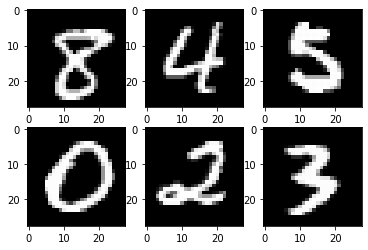

In [42]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# device config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device used: {device}")

# hyperparameters
input_size = 784 # 28 x 28
hidden_size = 100
num_classes = 10
n_epochs = 2
batch_size = 100
learning_rate = 0.01

# load data
train_dataset = torchvision.datasets.MNIST(root="../data", train=True, transform=transforms.ToTensor(), download=False)
test_dataset = torchvision.datasets.MNIST(root="../data", train=False, transform=transforms.ToTensor(), download=False)

# data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# plot samples
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap="gray") # [0] for first channel
    
# define model
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes=10):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.relu(out)
        out = self.layer2(out)
        return out
model = NeuralNet(input_size, hidden_size, num_classes)
    
    
# define loss & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

# training loop
n_total_steps = len(train_loader)
for epoch in range(n_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # reshape images from 100 x 1 x 28 x 28 --> 100 x 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i + 1) % 100 == 0:
            print(f"Epoch: {epoch + 1}/{n_epochs}, Step: {i+1}/{n_total_steps}, Loss: {loss.item():.4f}")
            
# evaluation
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        # reshape images from 100 x 1 x 28 x 28 --> 100 x 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        
        # returns value, index and we are interested in "index"
        _, predictions = torch.max(outputs, axis=1)
        n_samples = n_samples + labels.shape[0]
        
        n_correct = (predictions == labels).sum().item()
        
    acc = 100.0 * (n_correct/n_samples)
    print(f"Accuracy: {acc}")

## CNN

Device used: cpu
torch.Size([4, 3, 32, 32]) torch.Size([4])


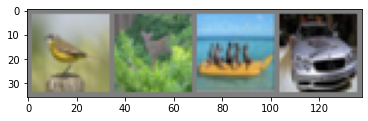

Epoch: 1/4, Step: 100/12500, Loss: 2.3229
Epoch: 1/4, Step: 200/12500, Loss: 2.2994
Epoch: 1/4, Step: 300/12500, Loss: 2.3219
Epoch: 1/4, Step: 400/12500, Loss: 2.2784
Epoch: 1/4, Step: 500/12500, Loss: 2.3050
Epoch: 1/4, Step: 600/12500, Loss: 2.2925
Epoch: 1/4, Step: 700/12500, Loss: 2.2746
Epoch: 1/4, Step: 800/12500, Loss: 2.2970
Epoch: 1/4, Step: 900/12500, Loss: 2.2942
Epoch: 1/4, Step: 1000/12500, Loss: 2.2699
Epoch: 1/4, Step: 1100/12500, Loss: 2.2947
Epoch: 1/4, Step: 1200/12500, Loss: 2.2900
Epoch: 1/4, Step: 1300/12500, Loss: 2.2756
Epoch: 1/4, Step: 1400/12500, Loss: 2.2929
Epoch: 1/4, Step: 1500/12500, Loss: 2.3100
Epoch: 1/4, Step: 1600/12500, Loss: 2.2920
Epoch: 1/4, Step: 1700/12500, Loss: 2.2869
Epoch: 1/4, Step: 1800/12500, Loss: 2.3276
Epoch: 1/4, Step: 1900/12500, Loss: 2.2851
Epoch: 1/4, Step: 2000/12500, Loss: 2.2916
Epoch: 1/4, Step: 2100/12500, Loss: 2.3230
Epoch: 1/4, Step: 2200/12500, Loss: 2.2976
Epoch: 1/4, Step: 2300/12500, Loss: 2.2934
Epoch: 1/4, Step: 24

Epoch: 2/4, Step: 6700/12500, Loss: 1.8183
Epoch: 2/4, Step: 6800/12500, Loss: 1.7409
Epoch: 2/4, Step: 6900/12500, Loss: 1.8515
Epoch: 2/4, Step: 7000/12500, Loss: 1.6556
Epoch: 2/4, Step: 7100/12500, Loss: 1.5712
Epoch: 2/4, Step: 7200/12500, Loss: 2.0723
Epoch: 2/4, Step: 7300/12500, Loss: 1.7208
Epoch: 2/4, Step: 7400/12500, Loss: 1.6480
Epoch: 2/4, Step: 7500/12500, Loss: 1.7270
Epoch: 2/4, Step: 7600/12500, Loss: 2.1119
Epoch: 2/4, Step: 7700/12500, Loss: 1.9654
Epoch: 2/4, Step: 7800/12500, Loss: 2.3497
Epoch: 2/4, Step: 7900/12500, Loss: 1.9956
Epoch: 2/4, Step: 8000/12500, Loss: 2.0786
Epoch: 2/4, Step: 8100/12500, Loss: 2.0266
Epoch: 2/4, Step: 8200/12500, Loss: 1.5446
Epoch: 2/4, Step: 8300/12500, Loss: 1.8239
Epoch: 2/4, Step: 8400/12500, Loss: 1.8325
Epoch: 2/4, Step: 8500/12500, Loss: 1.8053
Epoch: 2/4, Step: 8600/12500, Loss: 1.9393
Epoch: 2/4, Step: 8700/12500, Loss: 1.9256
Epoch: 2/4, Step: 8800/12500, Loss: 2.2722
Epoch: 2/4, Step: 8900/12500, Loss: 2.0298
Epoch: 2/4,

Epoch: 4/4, Step: 800/12500, Loss: 1.6118
Epoch: 4/4, Step: 900/12500, Loss: 1.9301
Epoch: 4/4, Step: 1000/12500, Loss: 1.3632
Epoch: 4/4, Step: 1100/12500, Loss: 1.7323
Epoch: 4/4, Step: 1200/12500, Loss: 1.7981
Epoch: 4/4, Step: 1300/12500, Loss: 1.4414
Epoch: 4/4, Step: 1400/12500, Loss: 1.4674
Epoch: 4/4, Step: 1500/12500, Loss: 2.1255
Epoch: 4/4, Step: 1600/12500, Loss: 1.1527
Epoch: 4/4, Step: 1700/12500, Loss: 2.0200
Epoch: 4/4, Step: 1800/12500, Loss: 1.6550
Epoch: 4/4, Step: 1900/12500, Loss: 1.2686
Epoch: 4/4, Step: 2000/12500, Loss: 1.1754
Epoch: 4/4, Step: 2100/12500, Loss: 1.0477
Epoch: 4/4, Step: 2200/12500, Loss: 1.1953
Epoch: 4/4, Step: 2300/12500, Loss: 1.4746
Epoch: 4/4, Step: 2400/12500, Loss: 1.4866
Epoch: 4/4, Step: 2500/12500, Loss: 1.1344
Epoch: 4/4, Step: 2600/12500, Loss: 1.7418
Epoch: 4/4, Step: 2700/12500, Loss: 1.7845
Epoch: 4/4, Step: 2800/12500, Loss: 1.6703
Epoch: 4/4, Step: 2900/12500, Loss: 2.0346
Epoch: 4/4, Step: 3000/12500, Loss: 1.4043
Epoch: 4/4, S

In [43]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# device config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device used: {device}")

# hyperparameters
n_epochs = 4
batch_size = 4
learning_rate = 0.001

# transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# dataset
train_dataset = torchvision.datasets.CIFAR10(root="../data", train=True, download=False, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root="../data", train=False, download=False, transform=transform)

# dataloader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# plot samples
def imshow(img):
    img = img/2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

imshow(torchvision.utils.make_grid(samples))
    
# define classes
classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

# define model
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(in_features=16*5*5, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    
model = ConvNet().to(device)

# define loss & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# training loop
n_total_steps = len(train_loader)
for epoch in range(n_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # images have shape [4, 3, 32, 32] -> [4, 3, 1024]
        # input layer has 3 input channels, 6 oput channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)
        
        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backward
        optimizer.zero_grad()
        loss.backward()
        
        # update
        optimizer.step()
        
        if (i + 1) % 100 == 0:
            print(f"Epoch: {epoch + 1}/{n_epochs}, Step: {i+1}/{n_total_steps}, Loss: {loss.item():.4f}")
            
# evaluation
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        # reshape images from 100 x 1 x 28 x 28 --> 100 x 784
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        
        # returns value, index and we are interested in "index"
        _, predictions = torch.max(outputs, axis=1)
        n_samples = n_samples + labels.shape[0]
        n_correct = n_correct + (predictions == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predictions[i]
            if label == pred:
                n_class_correct[label] += 1
            n_class_samples[label] += 1
        
    acc = 100.0 * (n_correct/n_samples)
    print(f"Accuracy: {acc} %")
    
    for i in range(10):
        acc = 100 * n_class_correct[i] / n_class_samples[i]
        print(f"Accuracy: {classes[i]}: {acc} %")

## Transfer learning

In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

Device used: cpu
['ants', 'bees']


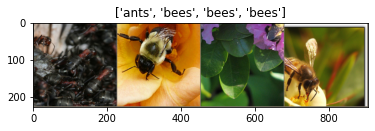

/home/kartheek/anaconda3/envs/pytorch_env/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/kartheek/anaconda3/envs/pytorch_env/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 0/1
----------
train Loss: 0.6856 Acc: 0.5984
val Loss: 0.5128 Acc: 0.8105

Epoch 1/1
----------
train Loss: 0.5359 Acc: 0.7910
val Loss: 0.3824 Acc: 0.8824

Training complete in 0m 24s
Best val Acc: 0.882353


In [45]:
# device config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device used: {device}")

mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

# transforms
data_transforms = {
    "train":
    transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    "val":
    transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])
}

# load datasets
data_dir = "../data/hymenoptera_data"
sets = ["train", "val"]
image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
    for x in sets
}
dataloaders = {
    x: torch.utils.data.DataLoader(image_datasets[x],
                                   batch_size=4,
                                   shuffle=True,
                                   num_workers=0)
    for x in sets
}
dataset_sizes = {x: len(image_datasets[x]) for x in sets}
class_names = image_datasets["train"].classes
print(class_names)


# plot some samples
def imshow(inp, title):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    plt.title(title)
    plt.show()


inputs, classes = next(iter(dataloaders['train']))
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])


# training method
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()  # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss,
                                                       epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

# import pre-trained model
## fine-tuning
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)
model.to(device)

# ## freeze all layers except last layer
# model = models.resnet18(pretrained=True)
# for param in model.parameters():
#     param.requires_grad = False
# num_features = model.fc.in_features
# model.fc = nn.Linear(num_features, 2)
# model.to(device)

# define loss & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# setup scheduler - updates learning_rate
# # Every 7 epochs, our lr is multiplied by 0.1 (i.e. 10%)
step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

model = train_model(model, criterion, optimizer, step_lr_scheduler, num_epochs=2)

## Using Tensorboard

Device used: cpu
torch.Size([100, 1, 28, 28]) torch.Size([100])
Epoch: 1/2, Step: 100/600, Loss: 0.2130
Epoch: 1/2, Step: 200/600, Loss: 0.5668
Epoch: 1/2, Step: 300/600, Loss: 0.1720
Epoch: 1/2, Step: 400/600, Loss: 0.1989
Epoch: 1/2, Step: 500/600, Loss: 0.1172
Epoch: 1/2, Step: 600/600, Loss: 0.1055
Epoch: 2/2, Step: 100/600, Loss: 0.1319
Epoch: 2/2, Step: 200/600, Loss: 0.1932
Epoch: 2/2, Step: 300/600, Loss: 0.0504
Epoch: 2/2, Step: 400/600, Loss: 0.1473
Epoch: 2/2, Step: 500/600, Loss: 0.0651
Epoch: 2/2, Step: 600/600, Loss: 0.1249
Accuracy: 0.9400000000000001


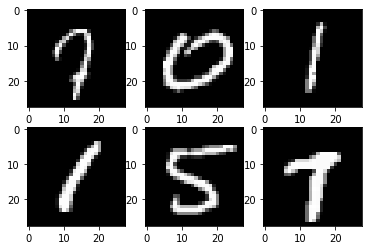

In [50]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter
import sys

# define tf-board
writer = SummaryWriter("../runs/mnist")

# device config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device used: {device}")

# hyperparameters
input_size = 784 # 28 x 28
hidden_size = 100
num_classes = 10
n_epochs = 2
batch_size = 100
learning_rate = 0.01

# load data
train_dataset = torchvision.datasets.MNIST(root="../data", train=True, transform=transforms.ToTensor(), download=False)
test_dataset = torchvision.datasets.MNIST(root="../data", train=False, transform=transforms.ToTensor(), download=False)

# data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# plot samples
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap="gray") # [0] for first channel
    
img_grid = torchvision.utils.make_grid(samples)
writer.add_image("mnist_images", img_grid)
    
# define model
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes=10):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.relu(out)
        out = self.layer2(out)
        return out
model = NeuralNet(input_size, hidden_size, num_classes)
    
    
# define loss & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

writer.add_graph(model, samples.reshape(-1, 28*28))

# training loop
n_total_steps = len(train_loader)
running_loss = 0.0
running_correct = 0
for epoch in range(n_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # reshape images from 100 x 1 x 28 x 28 --> 100 x 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        _, predictions = torch.max(outputs, axis=1)
        running_correct += (predictions == labels).sum().item()
        
        if (i + 1) % 100 == 0:
            print(f"Epoch: {epoch + 1}/{n_epochs}, Step: {i+1}/{n_total_steps}, Loss: {loss.item():.4f}")
            writer.add_scalar("training loss", running_loss/100, epoch * n_total_steps + i)
            writer.add_scalar("training accuracy", running_correct/100, epoch * n_total_steps + i)
            running_loss = 0.0
            running_correct = 0
            
# evaluation
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        # reshape images from 100 x 1 x 28 x 28 --> 100 x 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        
        # returns value, index and we are interested in "index"
        _, predictions = torch.max(outputs, axis=1)
        n_samples = n_samples + labels.shape[0]
        
        n_correct = (predictions == labels).sum().item()
        
    acc = 100.0 * (n_correct/n_samples)
    print(f"Accuracy: {acc}")